# Computer Vision Beginner's Guide Part 1

https://towardsdatascience.com/computer-vision-for-beginners-part-1-7cca775f58ef

## Image Processing

### Image Processing Fundamentals

1. Preprocessing: Ex. Noise reduction, Brightness & contrast enhancement
2. Camera Callibration: Geometric Calibration & Color Calibration
3. Image Processing:
    1. Matching:
        1. Corrlation Pattern Matching: By Image
        2. Geometric Pattern Matching: By Geometry (edges etc.)


In [1]:
%pip install opencv-python
%pip install opencv-contrib-python
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
cv2.__version__

'4.7.0'

In [3]:
dir = "/Users/swagam/Documents/Projects/ImageProcessing/Color_Draw/"

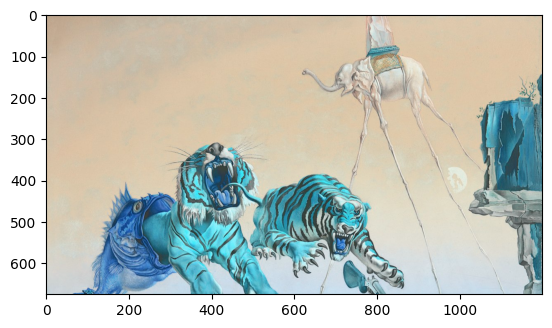

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import the image
img = cv2.imread(dir + 'dali_painting.jpeg')
plt.imshow(img)

The image looks wrong though, right? This is because the default setting of the color mode in OpenCV comes in the order of BGR, which is different from that of Matplotlib. Therefore to see the image in RGB mode, we need to convert it from BGR to RGB as follows.

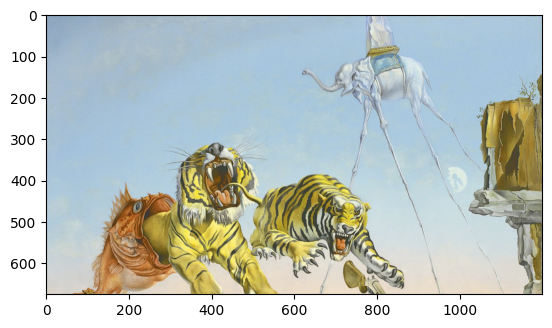

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### Color Models:
 A color model is a system for creating a full range of colors using the primary colors. There are two different color models here: **additive color models and subtractive color models**. Additive models use light to represent colors in computer screens while subtractive models use inks to print those digital images on papers. The primary colors are red, green and blue (RGB) for the first one and cyan, magenta, yellow and black (CMYK) for the latter one. 

 There are more! **Greyscale, HLS, and HSV** used widely in image processing.

#### Grayscale:
A grayscale is simple. It represents images and morphologies by the intensity of black and white, which means it has only one channel. To see images in grayscale, we need to convert the color mode into gray just as what we did with the BGR image earlier.

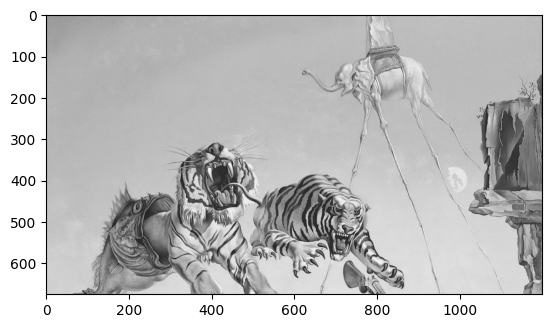

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

Actually, RGB images are made up by stacking three channels: R, G, and B. So if we take each channel and depict them one by one, we can comprehend how the color channels are structured.

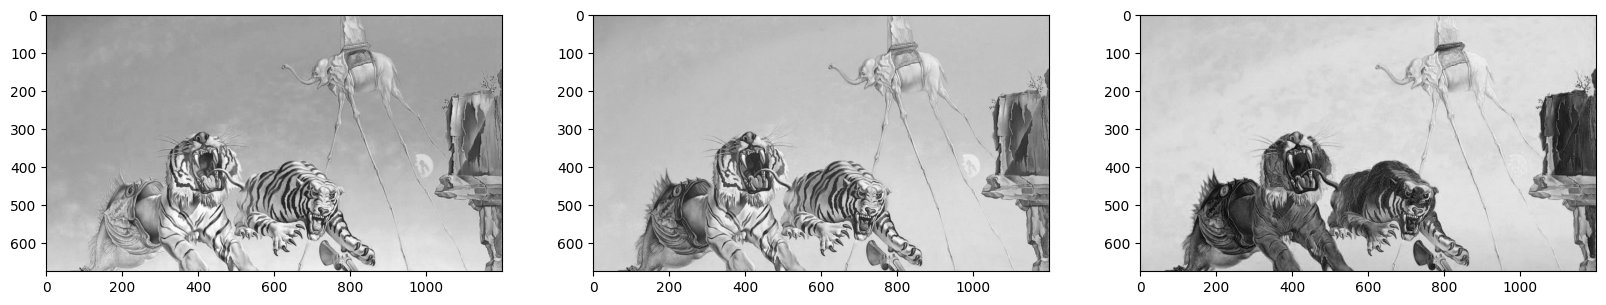

In [ ]:
# Plot the three channels of the image
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for i in range(0, 3):
    ax = axs[i]
    ax.imshow(img_rgb[:, :, i], cmap = 'gray')
plt.show()

Take a look at the images above. The three images show you how each channel is composed of. In the R channel picture, the part with the high saturation of red colors looks white. Why is that? This is because the values in the red color parts will be near 255. And in grayscale mode, the higher the value is, the whiter the color becomes. You can also check this with G or B channels and compare how certain parts differ one from another.

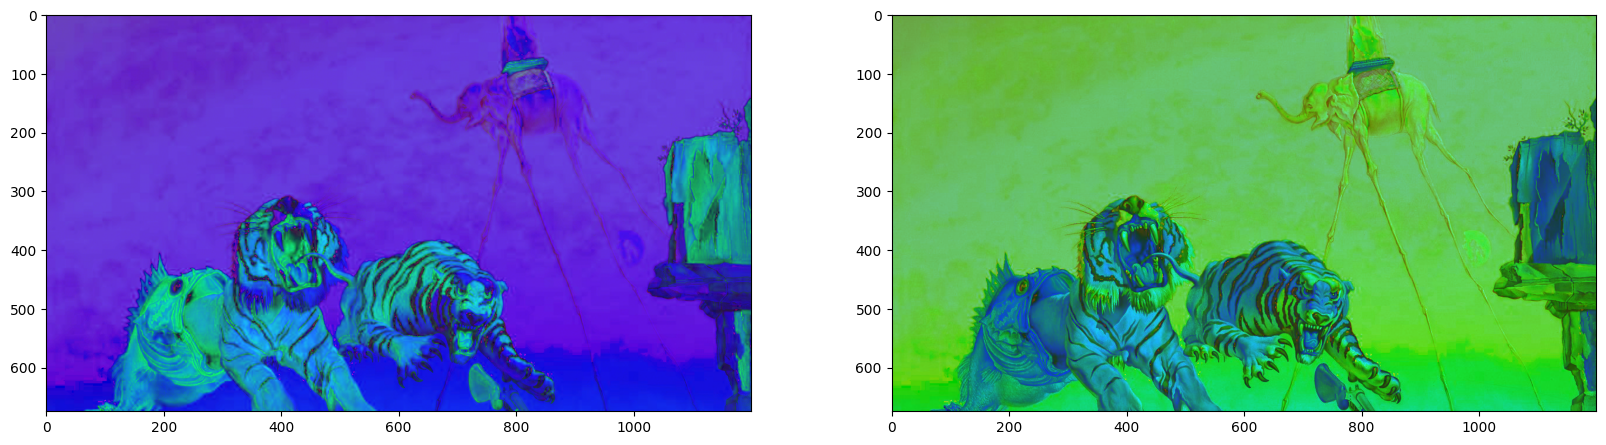

In [ ]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
ax1.imshow(img_hsv)
ax2.imshow(img_hls)
plt.show()

 ### Image processing is ‘data preprocessing.’ It’s reducing noises and extracting useful patterns to make classification and detection tasks easier. Therefore all these techniques including the ones we’ll discuss later, are for helping the model to detect the patterns easier.

## Drawing on Images

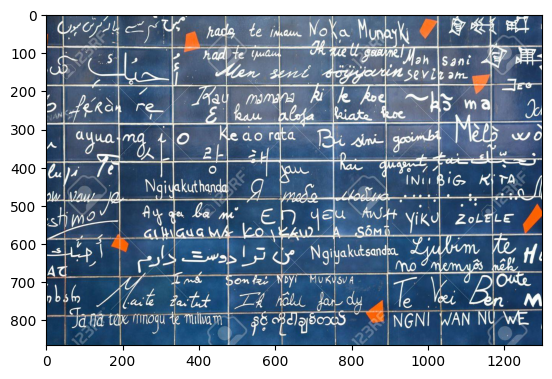

In [ ]:
img_wall = cv2.imread(dir + 'wall_of_love.jpg')
img_wall_rgb = cv2.cvtColor(img_wall, cv2.COLOR_BGR2RGB)
plt.imshow(img_wall_rgb)

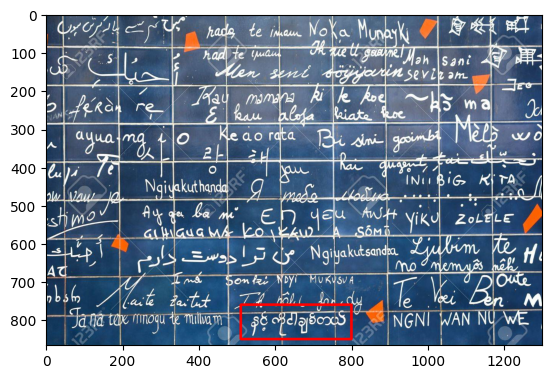

In [ ]:
#Copy the image
img_copy = img_wall_rgb.copy()

#Draw a rectangle
cv2.rectangle(img_copy, pt1=(510, 760), pt2=(800, 850), color=(255, 0, 0), thickness=5)
plt.imshow(img_copy)

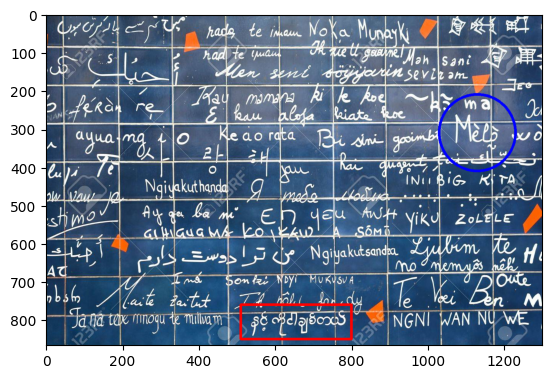

In [ ]:
#Draw a circle
cv2.circle(img_copy, center=(1130, 310), radius=100, color=(0,0,255), thickness=5)
plt.imshow(img_copy)

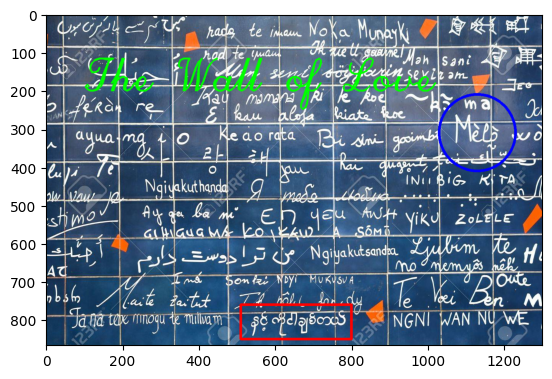

In [ ]:
#Add Text
cv2.putText(img_copy, text="The Wall of Love", org=(100, 200), fontFace=cv2.FONT_HERSHEY_SCRIPT_COMPLEX, fontScale=4, color=(0, 255, 0), thickness=4
, lineType = cv2.FILLED)
plt.imshow(img_copy)

## Interactions

In [ ]:
# Step 1. Define callback function
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
            cv2.circle(img, center = (x, y), radius = 50, 
                       color = (87, 184, 237), thickness = -1)
    elif event == cv2.EVENT_RBUTTONDOWN:        
            cv2.circle(img, center = (x, y), radius = 100,  
                       color = (87, 184, 237), thickness = 1)

# Step 2. Call the window
img = cv2.imread(dir + 'map.jpg')
cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_circle)


# Step 3. Execution
while True:
    cv2.imshow('my_drawing',img)
    if cv2.waitKey(10) & 0xFF == 27:
        break
cv2.destroyAllWindows()


KeyboardInterrupt: 